# Climate Change Analysis

In [202]:
#import required libraries & Modules
import pandas as pd
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [203]:
#import dataset
df=pd.read_csv('GlobalLandTemperaturesByState.csv')
df.head()


,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [204]:
print(df.dtypes)
print("Shape of data : ",df.shape)

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
State                             object
Country                           object
dtype: object
Shape of data :  (645675, 5)


In [205]:
#No of Country and state
df['Country'].nunique() , df['State'].nunique()

(7, 241)

In [206]:
df['Country'].unique()

array(['Brazil', 'Russia', 'United States', 'Canada', 'India', 'China',
       'Australia'], dtype=object)

## Select Russia for time-series analysis

In [207]:
df_ru=df[(df['Country'] == 'Russia')]

In [208]:
df_ru['State'].unique()

array(['Adygey', 'Aga Buryat', 'Altay', 'Amur', "Arkhangel'Sk",
       "Astrakhan'", 'Bashkortostan', 'Belgorod', 'Bryansk', 'Buryat',
       'Chechnya', 'Chelyabinsk', 'Chita', 'Chukot', 'Chuvash',
       'City Of St. Petersburg', 'Dagestan', 'Evenk', 'Gorno Altay',
       'Ingush', 'Irkutsk', 'Ivanovo', 'Kabardin Balkar', 'Kaliningrad',
       'Kalmyk', 'Kaluga', 'Kamchatka', 'Karachay Cherkess', 'Karelia',
       'Kemerovo', 'Khabarovsk', 'Khakass', 'Khanty Mansiy', 'Kirov',
       'Komi', 'Komi Permyak', 'Koryak', 'Kostroma', 'Krasnodar',
       'Krasnoyarsk', 'Kurgan', 'Kursk', 'Leningrad', 'Lipetsk',
       'Maga Buryatdan', 'Mariy El', 'Mordovia', 'Moscow City', 'Moskva',
       'Murmansk', 'Nenets', 'Nizhegorod', 'North Ossetia', 'Novgorod',
       'Novosibirsk', 'Omsk', 'Orel', 'Orenburg', 'Penza', "Perm'",
       "Primor'Ye", 'Pskov', 'Rostov', "Ryazan'", 'Sakha', 'Sakhalin',
       'Samara', 'Saratov', 'Smolensk', "Stavropol'", 'Sverdlovsk',
       'Tambov', 'Tatarstan', 'Ta

In [211]:
df_mos = df_ru[(df_ru['State'] == 'Moscow City')]

In [212]:
df_mos.shape

(3239, 5)

In [213]:
#Rename the columns
df_mos.rename(columns={'dt':'Date'},inplace=True)

In [214]:
# make Date column  index
df_mos['Date']=pd.to_datetime(df_mos['Date'])
df_mos.set_index('Date',inplace=True)
df_mos.index

DatetimeIndex(['1743-11-01', '1743-12-01', '1744-01-01', '1744-02-01',
               '1744-03-01', '1744-04-01', '1744-05-01', '1744-06-01',
               '1744-07-01', '1744-08-01',
               ...
               '2012-12-01', '2013-01-01', '2013-02-01', '2013-03-01',
               '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01',
               '2013-08-01', '2013-09-01'],
              dtype='datetime64[ns]', name='Date', length=3239, freq=None)

In [215]:
df_mos.head()

,AverageTemperature,AverageTemperatureUncertainty,State,Country
Date,,,,
1743-11-01,-2.57,3.086,Moscow City,Russia
1743-12-01,NaN,NaN,Moscow City,Russia
1744-01-01,NaN,NaN,Moscow City,Russia
1744-02-01,NaN,NaN,Moscow City,Russia
1744-03-01,NaN,NaN,Moscow City,Russia


In [216]:
#Find the missing value  
df_mos.isnull().sum()

AverageTemperature               73
AverageTemperatureUncertainty    73
State                             0
Country                           0
dtype: int64

## fill misssing value with Rolling average

In [217]:

df_mos['new_avg']= df_mos.AverageTemperature.fillna(df_mos.AverageTemperature.rolling(12,center=True,min_periods=1).mean())

In [219]:
df_mos.isnull().sum()

AverageTemperature               73
AverageTemperatureUncertainty    73
State                             0
Country                           0
new_avg                          45
dtype: int64

In [220]:
df_mos.index.min(),df_mos.index.max()

(Timestamp('1743-11-01 00:00:00'), Timestamp('2013-09-01 00:00:00'))

In [225]:
df_mos.loc['1743':'1750','new_avg'].isnull().sum()

45

In [226]:
df_mos.loc['1750':'1800','new_avg'].isnull().sum()

0

In [227]:
df_mos.loc['1800':'2013','new_avg'].isnull().sum()

0

In [228]:
# As between 1743-1750 there are missing value select time-series from 1750

In [229]:
latest_df= df_mos.loc['1750':'2013']

In [230]:
latest_df['new_avg'].isnull().sum()

0

In [231]:
#take data between 1750 to 2013 for analysis

latest_df.head()

,AverageTemperature,AverageTemperatureUncertainty,State,Country,new_avg
Date,,,,,
1750-01-01,-7.495,3.480,Moscow City,Russia,-7.495
1750-02-01,-7.228,3.796,Moscow City,Russia,-7.228
1750-03-01,-2.461,4.099,Moscow City,Russia,-2.461
1750-04-01,5.163,3.472,Moscow City,Russia,5.163
1750-05-01,11.404,3.527,Moscow City,Russia,11.404


In [232]:
latest_df.shape

(3165, 5)

In [233]:
#Rename the columns
latest_df.rename(columns={'new_avg':'Avg_Temp'},inplace=True)

In [234]:
#Resample
resample_df=latest_df[['Avg_Temp']]
resample_df.head()

,Avg_Temp
Date,
1750-01-01,-7.495
1750-02-01,-7.228
1750-03-01,-2.461
1750-04-01,5.163
1750-05-01,11.404


In [235]:
resample_df.index.min(),resample_df.index.max()


(Timestamp('1750-01-01 00:00:00'), Timestamp('2013-09-01 00:00:00'))

In [236]:
resample_df.shape

(3165, 1)

In [237]:
resample_df.describe()

,Avg_Temp
count,3165.000000
mean,4.003725
std,10.266207
min,-19.376000
25%,-5.058000
50%,4.122000
75%,14.024000
max,24.580000


In [238]:
resample_df.isnull().sum()

Avg_Temp    0
dtype: int64

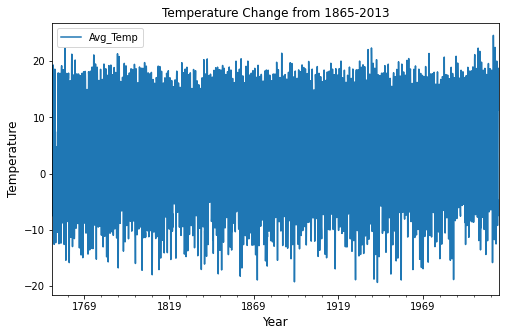

In [239]:
#Plot 
resample_df.plot(title='Temperature Change from 1865-2013',figsize=(8,5))
plt.ylabel('Temperature',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.legend()

# Climate change forcasting


# ARIMA

In [240]:
resample_df.head()

,Avg_Temp
Date,
1750-01-01,-7.495
1750-02-01,-7.228
1750-03-01,-2.461
1750-04-01,5.163
1750-05-01,11.404


In [241]:
resample_df.shape

(3165, 1)

In [242]:
#AUTO ARIMA
!pip install pmdarima

In [243]:
y=resample_df.Avg_Temp.values

In [244]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split

In [245]:
train, test = train_test_split(resample_df, train_size=int(0.9 * resample_df.shape[0]))

In [246]:
train.shape,test.shape

((2848, 1), (317, 1))

In [247]:
# Fit your model
model = pm.auto_arima( train, start_p=5, max_p=10, seasonal=True, trace = True) #seasonal =False
# random search
# make your forecasts
forecasts = model.predict(test.shape[0])

Performing stepwise search to minimize aic
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=13800.385, Time=6.00 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=21371.821, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=18004.262, Time=0.20 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=18873.356, Time=0.61 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=21739.074, Time=0.03 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=13962.987, Time=4.80 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=13734.728, Time=2.77 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=13820.226, Time=2.13 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=1.32 sec
 ARIMA(6,0,1)(0,0,0)[0] intercept   : AIC=13700.570, Time=4.64 sec
 ARIMA(6,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.82 sec
 ARIMA(7,0,1)(0,0,0)[0] intercept   : AIC=13692.913, Time=3.41 sec
 ARIMA(7,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=1.29 sec
 ARIMA(8,0,1)(0,0,0)[0] intercept   : AIC=13616.389, Time=8.59 sec
 ARIMA(8,0,0)(0,0,0)[0] intercept   :

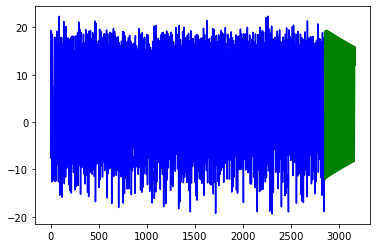

In [251]:
# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(resample_df.shape[0])
plt.plot(x[:2848], train, c='blue')
plt.plot(x[2848:], forecasts, c='green')
plt.show()

In [252]:
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [253]:
train_size = int(0.9 * resample_df.shape[0])
test_size = resample_df.shape[0] - train_size

In [254]:
model = ARIMA(train, order=(10,0,1))#order is p,d,q
model_fit = model.fit()
output = model_fit.forecast(test_size)
output

1987-05-01    10.446412
1987-06-01    16.873387
1987-07-01    18.988926
1987-08-01    17.152105
1987-09-01    12.410958
                ...    
2013-05-01     6.410308
2013-06-01     9.803450
2013-07-01    11.590986
2013-08-01    11.302780
2013-09-01     9.024948
Freq: MS, Name: predicted_mean, Length: 317, dtype: float64

In [255]:
output[0]

10.446412219087001

In [256]:
mean_squared_error(test,output)

16.30926708759487

In [257]:
mean_squared_error(test,output)**0.5

4.038473361010924

In [258]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(test,output)

0.9791991774787279

#  Apply regression on TS using lag values

In [259]:
reg_data=resample_df.copy()

In [260]:
reg_data.head()

,Avg_Temp
Date,
1750-01-01,-7.495
1750-02-01,-7.228
1750-03-01,-2.461
1750-04-01,5.163
1750-05-01,11.404


In [261]:
reg_data.shape

(3165, 1)

In [262]:
reg_data.columns

Index(['Avg_Temp'], dtype='object')

In [263]:
reg_data['lag1']=reg_data['Avg_Temp'].shift(1)
reg_data['lag2']=reg_data['Avg_Temp'].shift(2)
reg_data['lag3']=reg_data['Avg_Temp'].shift(3)
reg_data['lag4']=reg_data['Avg_Temp'].shift(4)
reg_data['lag5']=reg_data['Avg_Temp'].shift(5)

In [264]:
reg_data.head(10)

,Avg_Temp,lag1,lag2,lag3,lag4,lag5
Date,,,,,,
1750-01-01,-7.495,NaN,NaN,NaN,NaN,NaN
1750-02-01,-7.228,-7.495,NaN,NaN,NaN,NaN
1750-03-01,-2.461,-7.228,-7.495,NaN,NaN,NaN
1750-04-01,5.163,-2.461,-7.228,-7.495,NaN,NaN
1750-05-01,11.404,5.163,-2.461,-7.228,-7.495,NaN
1750-06-01,16.239,11.404,5.163,-2.461,-7.228,-7.495
1750-07-01,19.300,16.239,11.404,5.163,-2.461,-7.228
1750-08-01,17.449,19.300,16.239,11.404,5.163,-2.461
1750-09-01,10.004,17.449,19.300,16.239,11.404,5.163


In [265]:
df_r=reg_data.loc['1750-06-01':,:]

In [266]:
df_r.shape

(3160, 6)

In [267]:
df_r.columns

Index(['Avg_Temp', 'lag1', 'lag2', 'lag3', 'lag4', 'lag5'], dtype='object')

In [268]:
df_r.head()

,Avg_Temp,lag1,lag2,lag3,lag4,lag5
Date,,,,,,
1750-06-01,16.239,11.404,5.163,-2.461,-7.228,-7.495
1750-07-01,19.300,16.239,11.404,5.163,-2.461,-7.228
1750-08-01,17.449,19.300,16.239,11.404,5.163,-2.461
1750-09-01,10.004,17.449,19.300,16.239,11.404,5.163
1750-10-01,0.517,10.004,17.449,19.300,16.239,11.404


#  X & Y split 

In [269]:
X = df_r.drop(['Avg_Temp'],axis=1)
Y = df_r['Avg_Temp']

In [270]:
X.shape, Y.shape

((3160, 5), (3160,))

In [271]:
size = int(len(X) * 0.9)
X_train, X_test = X[0:size], X[size:len(X)]
Y_train, Y_test = Y[0:size], Y[size:len(X)]

In [272]:
X_train.shape, X_test.shape,Y_train.shape, Y_test.shape

((2844, 5), (316, 5), (2844,), (316,))

#  Apply regression algorithm

## Linear regression

In [273]:
from sklearn.linear_model import LinearRegression

In [274]:
reg = LinearRegression().fit(X_train, Y_train)

In [275]:
Y_pred = reg.predict(X_test)

In [276]:
mean_squared_error(Y_test,Y_pred)

9.974244460919367

In [277]:
mean_squared_error(Y_test,Y_pred)**0.5

3.158202726380839

In [278]:
mean_absolute_percentage_error(Y_test,Y_pred)

0.8756751550212388

## RandomForestRegressor

In [279]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor( random_state = 7)

In [280]:
rfr.fit(X_train,Y_train)

RandomForestRegressor(random_state=7)

In [281]:
Y_pred_rfr = rfr.predict(X_test)

In [282]:
mean_squared_error(Y_test,Y_pred_rfr)

10.191777398099692

In [283]:
mean_squared_error(Y_test,Y_pred_rfr)**0.5

3.192456326733334

In [284]:
mean_absolute_percentage_error(Y_test,Y_pred_rfr)

0.9762401869384596

# LSTM_Time_series

In [285]:
resample_df.head()

,Avg_Temp
Date,
1750-01-01,-7.495
1750-02-01,-7.228
1750-03-01,-2.461
1750-04-01,5.163
1750-05-01,11.404


<AxesSubplot:xlabel='Date'>

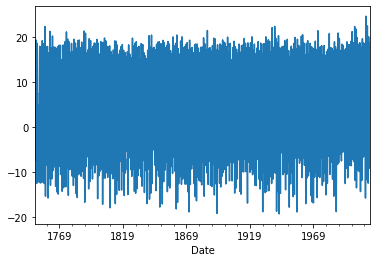

In [286]:
resample_df['Avg_Temp'].plot()

In [287]:
lstm_data=resample_df[['Avg_Temp']].copy()

In [288]:
lstm_data.shape

(3165, 1)

In [289]:
lstm_data.head()

,Avg_Temp
Date,
1750-01-01,-7.495
1750-02-01,-7.228
1750-03-01,-2.461
1750-04-01,5.163
1750-05-01,11.404


In [290]:
dataset_train = lstm_data.iloc[:2565,:]
dataset_train.shape

(2565, 1)

In [291]:
# Convert data frame / series to numpy array
training_set = dataset_train.iloc[:, 0].values
training_set[:5]

array([-7.495, -7.228, -2.461,  5.163, 11.404])

In [292]:
training_set.shape

(2565,)

# Add extra dimemsion to the data for processing in RNN / LSTM neuron

In [293]:
# Add extra dim for processing purpose
training_set = training_set.reshape(-1,1)

In [294]:
training_set[:5]

array([[-7.495],
       [-7.228],
       [-2.461],
       [ 5.163],
       [11.404]])

In [295]:
training_set.shape

(2565, 1)

<AxesSubplot:>

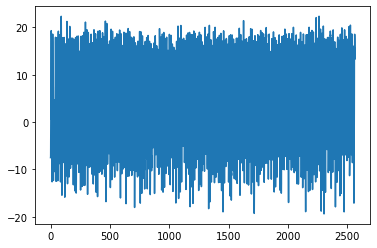

In [296]:
pd.Series(training_set.flat).plot()

In [297]:
#Transform time series for having lag values and output variable

In [298]:
timesteps=5 # How many lag Values to train the data
trn_size = dataset_train.shape[0]

In [299]:
# add lag values to train dataset
X_train = []
y_train = []
for i in range(timesteps, trn_size):
    X_train.append(training_set[i-timesteps:i, 0])
    y_train.append(training_set[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [300]:
X_train.shape

(2560, 5)

In [301]:
y_train.shape

(2560,)

In [302]:
X_train[:1]

array([[-7.495, -7.228, -2.461,  5.163, 11.404]])

In [303]:
y_train[:1]

array([16.239])

In [304]:
pd.DataFrame(X_train).head()

,0,1,2,3,4
0,-7.495,-7.228,-2.461,5.163,11.404
1,-7.228,-2.461,5.163,11.404,16.239
2,-2.461,5.163,11.404,16.239,19.300
3,5.163,11.404,16.239,19.300,17.449
4,11.404,16.239,19.300,17.449,10.004


## Reshape X_train to add extra dimension

In [305]:
#It is added to be processed easily by RNN / LSTM
#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [306]:
X_train.shape

(2560, 5, 1)

In [307]:
X_train[:1]

array([[[-7.495],
        [-7.228],
        [-2.461],
        [ 5.163],
        [11.404]]])

## Building the LSTM

In [308]:
import tensorflow as tf
from tensorflow import keras

In [309]:
type(X_train)

numpy.ndarray

In [310]:
(X_train.shape[1],X_train.shape[2])

(5, 1)

In [311]:
#create the model

model_lstm = keras.Sequential()

# Adding LSTM layers
# inputlayer()
model_lstm.add(keras.layers.LSTM(units=10,#return_sequences = True, 
                            input_shape= (X_train.shape[1],X_train.shape[2]) ))

# Adding the output layer
model_lstm.add(keras.layers.Dense(1))

# Compiling the RNN
model_lstm.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [312]:
model_lstm.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 10)                480       
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


## Fitting the RNN to the Training set

In [313]:
history = model_lstm.fit( X_train, y_train, validation_split=0.1,epochs = 50, batch_size = 10)

Epoch 1/50
231/231 [==============================] - 3s 6ms/step - loss: 109.4104 - val_loss: 97.2385
Epoch 2/50
231/231 [==============================] - 1s 3ms/step - loss: 80.4425 - val_loss: 67.4089
Epoch 3/50
231/231 [==============================] - 1s 4ms/step - loss: 54.3047 - val_loss: 45.3789
Epoch 4/50
231/231 [==============================] - 1s 6ms/step - loss: 37.2016 - val_loss: 31.7302
Epoch 5/50
231/231 [==============================] - 1s 3ms/step - loss: 25.1419 - val_loss: 19.8416
Epoch 6/50
231/231 [==============================] - 2s 7ms/step - loss: 15.9674 - val_loss: 14.0054
Epoch 7/50
231/231 [==============================] - 2s 7ms/step - loss: 11.9861 - val_loss: 11.8051
Epoch 8/50
231/231 [==============================] - 2s 9ms/step - loss: 9.7890 - val_loss: 9.8889
Epoch 9/50
231/231 [==============================] - 1s 5ms/step - loss: 8.4281 - val_loss: 8.8021
Epoch 10/50
231/231 [==============================] - 1s 4ms/step - loss: 7.6395 - v

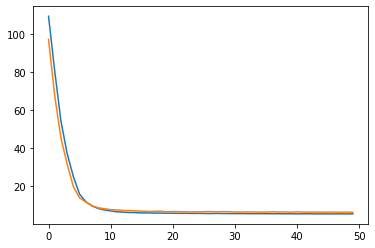

In [314]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

#  Tunning LSTM

In [315]:
#create the model

model_lstm1 = keras.Sequential()

# Adding LSTM layers
# inputlayer()
model_lstm1.add(keras.layers.LSTM(units=20,#return_sequences = True, 
                            input_shape= (X_train.shape[1],X_train.shape[2]) ))

# Adding the output layer
model_lstm1.add(keras.layers.Dense(1))

# Compiling the RNN
model_lstm1.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [316]:
model_lstm1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 20)                1760      
                                                                 
 dense_7 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


In [317]:
history1 = model_lstm1.fit( X_train, y_train, validation_split=0.1,epochs = 100, batch_size = 20)

Epoch 1/100
116/116 [==============================] - 3s 6ms/step - loss: 96.2284 - val_loss: 79.9715
Epoch 2/100
116/116 [==============================] - 0s 3ms/step - loss: 63.3966 - val_loss: 50.6785
Epoch 3/100
116/116 [==============================] - 0s 3ms/step - loss: 40.6720 - val_loss: 32.7186
Epoch 4/100
116/116 [==============================] - 0s 3ms/step - loss: 26.3978 - val_loss: 21.8631
Epoch 5/100
116/116 [==============================] - 0s 3ms/step - loss: 18.4931 - val_loss: 16.1522
Epoch 6/100
116/116 [==============================] - 0s 3ms/step - loss: 13.8668 - val_loss: 12.5597
Epoch 7/100
116/116 [==============================] - 0s 3ms/step - loss: 10.8004 - val_loss: 10.3192
Epoch 8/100
116/116 [==============================] - 0s 3ms/step - loss: 8.9455 - val_loss: 8.7375
Epoch 9/100
116/116 [==============================] - 0s 3ms/step - loss: 7.7968 - val_loss: 7.8779
Epoch 10/100
116/116 [==============================] - 0s 3ms/step - loss: 7

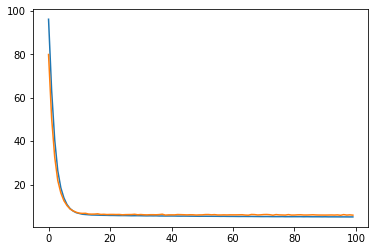

In [318]:
import matplotlib.pyplot as plt
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])